In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
model = Sequential()

# Convolution Layer 1
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 2
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - accuracy: 0.8250 - loss: 0.5690 - val_accuracy: 0.9817 - val_loss: 0.0664
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.9738 - loss: 0.0851 - val_accuracy: 0.9852 - val_loss: 0.0538
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.9821 - loss: 0.0589 - val_accuracy: 0.9890 - val_loss: 0.0397
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.9852 - loss: 0.0449 - val_accuracy: 0.9895 - val_loss: 0.0394
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.9879 - loss: 0.0392 - val_accuracy: 0.9910 - val_loss: 0.0344
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.9896 - loss: 0.0318 - val_accuracy: 0.9907 - val_loss: 0.0331
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9913 - loss: 0.0278 - val_accuracy: 0.9908 - val_loss: 0.0372
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9926 - loss: 0.0235 -

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9891 - loss: 0.0363
Test Accuracy: 0.9914000034332275


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


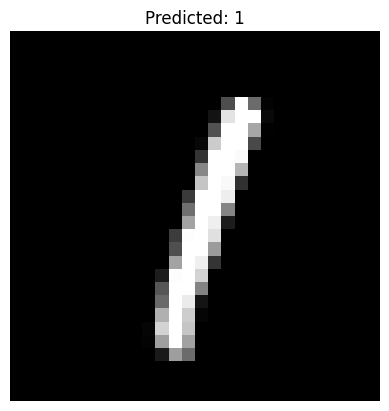

In [ ]:
predictions = model.predict(X_test)

# Show one prediction
index = 5
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.title("Predicted: " + str(np.argmax(predictions[index])))
plt.axis('off')
plt.show()


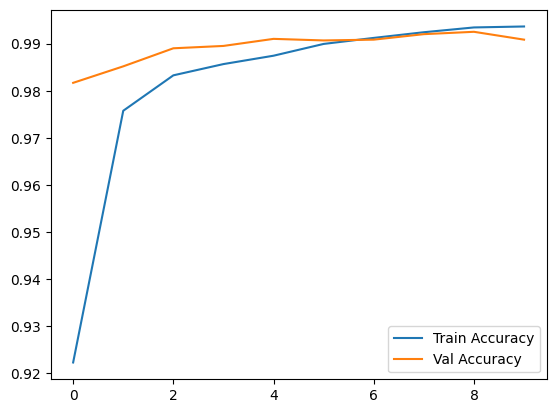

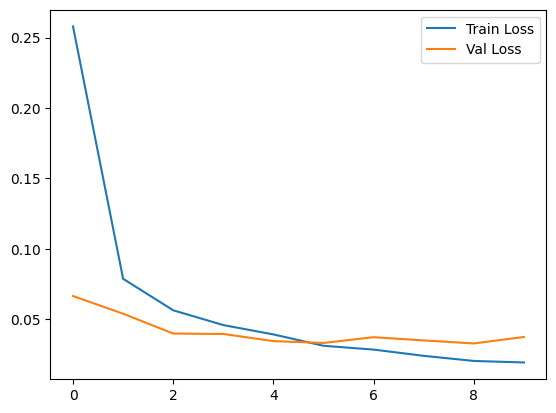

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()